# Set the NOMAD Upload id
- Use the doi to find the nomad dataset
- go to the entry page
- copy the Uplaod id and paste it here

In [1]:
upload_id = '6NzAe8uWS5SCsuKNvl7EUw'

# SEM example dataset
## Introduction
SEM images of the $\mathrm{Mn}_{53.5}\mathrm{Al}_{43.5}\mathrm{Bi}_3$-sample after annealing at 1100°C for 2h, quenching directly in water.

This notebook demonstrates how to work with SEM-images. We will treat each image as a numpy array and extract the metadata with the package sem_io.
## Data analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from sem_io.metadata_extractor import SEMparams 
import requests

#dataDir = 'IFW_SEM_RawData/'
url = f'https://nomad-lab.eu/prod/v1/api/v1/uploads/{upload_id}/raw/IFW_SEM_RawData/22632_05_CBS.tif'
response = requests.get(url)
with open('22632_05_CBS.tif', "wb") as f:
        f.write(response.content)

### Load an image and the respective metadata

In [3]:
#img_path = dataDir + '22632_05_CBS.tif'
img_path = '22632_05_CBS.tif'
img = plt.imread(img_path)
meta = SEMparams(img_path, verbose=False).params_grouped

Here is the image at the image at the moment:

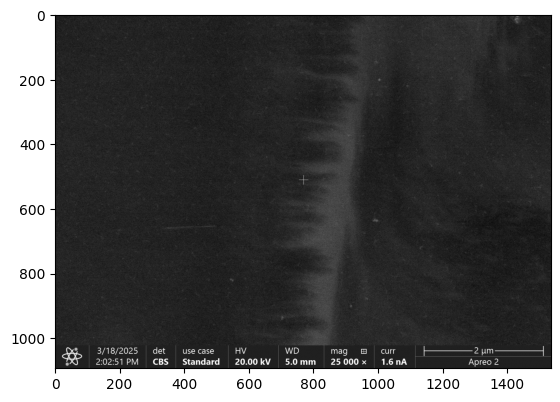

In [4]:
plt.imshow(img, cmap='gray')

As we can see this is quite dark. Let's fix this. While we're at it we can also crop off the info bar. We get the actual height of the image from the metadata.

Text(0, 0.5, 'Relative density')

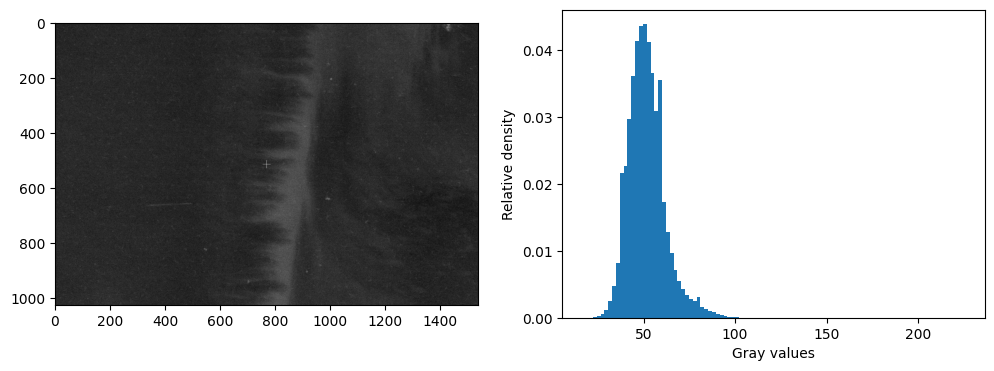

In [5]:
img = img[:int(meta['Image']['ResolutionY']), :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(img, cmap='gray')
n, bins, patches = ax2.hist(img.flatten(), 100, density=True)
ax2.set_xlabel('Gray values')
ax2.set_ylabel('Relative density')

By inspecting the histogram of gray values we can now adjust the contrast and brightness of the image. We'll norm all gray values to new values between the left and right side of the main peak.

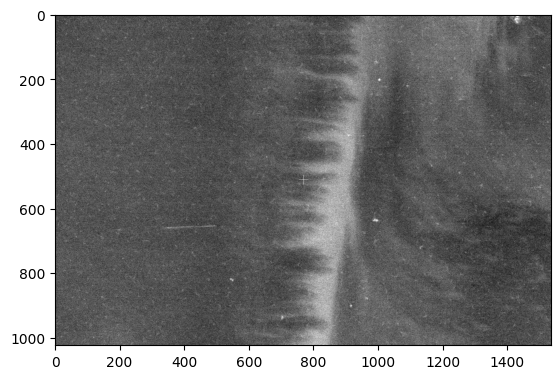

In [6]:
minval = 20
maxval = 110

img = (img - minval) / (maxval - minval)

plt.imshow(img, cmap='gray', vmin=0, vmax=1)

Now we can also conveniently add a scalebar.

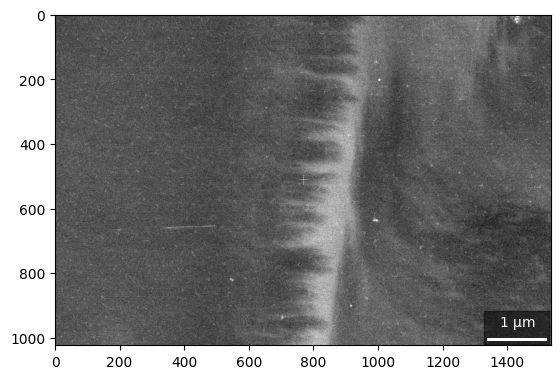

In [7]:
fig, ax = plt.subplots()

ax.imshow(img, cmap='gray', vmin=0, vmax=1)

pixel_size, unit = SEMparams.get_image_pixel_size(img_path)
scalebar = ScaleBar(pixel_size, units=unit, location='lower right', scale_loc='top', color='white', box_color='k', box_alpha=0.5)
ax.add_artist(scalebar)

We can also plot a line profile.

Text(0, 0.5, 'Intensity in a.u.')

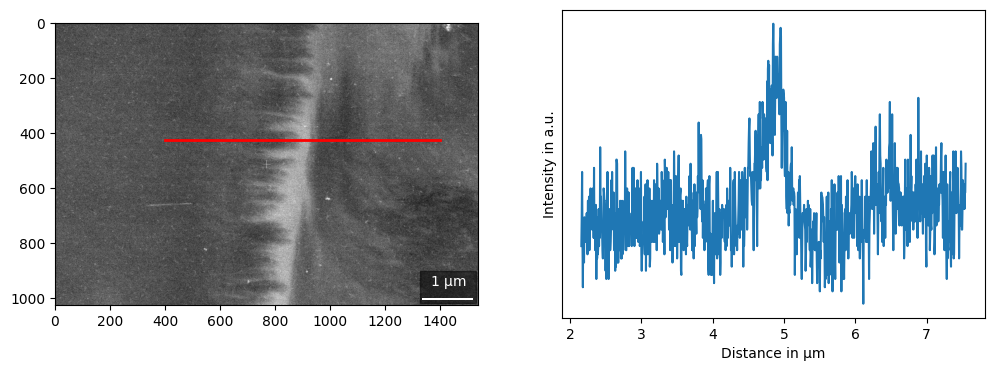

In [8]:
y1 = 425
x1, x2 = 400, 1400

y = img[y1, x1:x2]
x = np.arange(x1, x2, 1) * pixel_size  # convert from pixels to real space with pixel width
x = x * 1e6  # convert from meters to µm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.imshow(img, cmap='gray', vmin=0, vmax=1)
ax1.plot([x1, x2], [y1, y1], c='r', linewidth=2)
scalebar = ScaleBar(pixel_size, units=unit, location='lower right', scale_loc='top', color='white', box_color='k', box_alpha=0.5)
ax1.add_artist(scalebar)

ax2.plot(x, y)
ax2.set_xlabel('Distance in µm')
ax2.set_yticks([])
ax2.set_ylabel('Intensity in a.u.')